# 🔍 Diagnóstico de Câncer de Mama com Regressão Logística (GLM)

Este projeto aplica um **modelo GLM (Generalized Linear Model)** com família **Binomial (Regressão Logística)** para prever se um tumor é **maligno** (`1`) ou **benigno** (`0`), com base em atributos morfológicos extraídos de exames de biópsia.

---

## 📊 Sobre os Dados

Utilizamos o dataset `breast_cancer` do `sklearn`, que contém 569 amostras com características de células tumorais.

Neste modelo, selecionamos 3 variáveis preditoras:

| Variável            | Significado                                               |
|---------------------|-----------------------------------------------------------|
| `mean radius`       | Tamanho médio do núcleo das células tumorais              |
| `mean texture`      | Variação da textura das células                           |
| `mean smoothness`   | Suavidade das bordas das células (regularidade)           |

---

## ⚙️ Sobre o Modelo

O modelo foi treinado usando **GLM com link logit**, apropriado para problemas de classificação binária.

A variável-alvo (`maligno`) indica:
- `1` → tumor maligno
- `0` → tumor benigno

---

## 📈 Coeficientes e Interpretação

| Variável             | Coef.    | Interpretação prática                                                                 |
|----------------------|----------|----------------------------------------------------------------------------------------|
| Intercept            | +48.71   | Valor base matemático para iniciar o cálculo da log-odds                              |
| `mean radius`        | **-1.54**| Raio maior → menor chance de ser maligno                                              |
| `mean texture`       | **-0.43**| Textura maior → menor chance de malignidade                                           |
| `mean smoothness`    | **-185.77**| Alta suavidade → reduz fortemente a probabilidade de malignidade                    |

> ✅ Todos os coeficientes possuem **p-valor < 0.001**, o que indica **alta significância estatística**.

---

## 📊 Exemplo prático das previsões

| `maligno` | `mean radius` | `mean texture` | `mean smoothness` | `prob_maligno` | `classe_predita` | Interpretação                                 |
|-----------|----------------|----------------|--------------------|----------------|------------------|----------------------------------------------|
| 0         | 19.55          | 28.77          | 0.0926             | 0.0000176      | 0                | Quase certeza de que é benigno               |
| 1         | 11.13          | 16.62          | 0.0815             | 0.9999         | 1                | Altíssima chance de ser maligno              |
| 0         | 13.82          | 24.49          | 0.1162             | 0.0094         | 0                | Baixa chance de ser maligno                  |
| 1         | 16.50          | 18.29          | 0.0969             | 0.0716         | 0 ❌             | Classificação incorreta                      |
| 0         | 21.56          | 22.39          | 0.1110             | 0.0000004      | 0                | Previsão correta e extremamente confiante     |

---

## 📈 Métricas do Modelo (teste)

| Métrica                 | Valor   | Interpretação                                                                 |
|------------------------|---------|-------------------------------------------------------------------------------|
| **Acurácia**           | 0.8596  | ~86% das classificações foram corretas                                       |
| **Precisão**           | 0.9516  | 95% das previsões de “maligno” estavam corretas                              |
| **Recall**             | 0.8194  | O modelo detectou 82% dos casos realmente malignos                           |
| **F1-Score**           | 0.8806  | Bom equilíbrio entre precisão e recall                                       |
| **ROC AUC**            | 0.9716  | Excelente separação entre as classes                                          |

---

## 📊 Estatísticas do Modelo GLM – Explicadas

| Estatística            | Valor     | O que significa                                                                                   |
|------------------------|-----------|----------------------------------------------------------------------------------------------------|
| **`Log-Likelihood`**   | -66.007   | Mede a verossimilhança do modelo gerar os dados observados. Quanto **mais próximo de 0**, melhor. |
| **`Deviance`**         | 132.01    | Mede o erro total ajustado do modelo. Quanto **menor**, melhor. Zero seria o modelo perfeito.     |
| **`Pearson chi²`**     | 262       | Soma dos resíduos padronizados ao quadrado. Valores altos podem indicar ajuste imperfeito.        |
| **`Pseudo R² (CS)`**   | 0.6436    | Equivalente ao R² em modelos lineares. Indica que o modelo explica **~64,36% da variabilidade**.  |
| **`Iterações`**        | 8         | Quantas vezes o algoritmo precisou ajustar os pesos até convergir. Até 25 é considerado ideal.     |
| **`Amostras no treino`** | 455     | Quantidade de registros usados para treinar o modelo (dados de treino).                          |


---

## 📌 Conclusão

- ✅ O modelo mostrou-se estatisticamente sólido e bem ajustado
- 📊 Desempenho excelente nas métricas de classificação
- 🔬 Variáveis escolhidas são estatisticamente significativas
- 🧠 A interpretação é coerente com o conhecimento médico sobre tumores

---

## 🛠️ Como rodar este projeto

### ▶️ Requisitos:

```bash
pip install pandas scikit-learn statsmodels matplotlib
```

### ▶️ Execução:
Basta rodar o script Python com seu Jupyter ou VSCode.
Você verá:
- Resumo estatístico
- Métricas do modelo
- Gráfico ROC
- Tabela com previsões reais

---


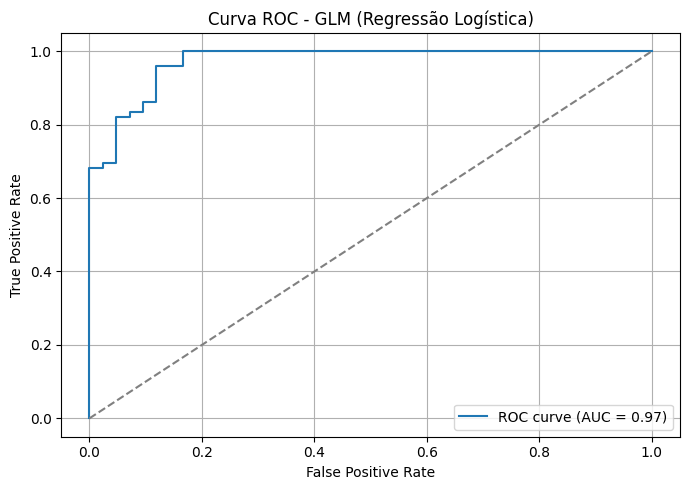

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                maligno   No. Observations:                  455
 Model:                            GLM   Df Residuals:                      451
 Model Family:                Binomial   Df Model:                            3
 Link Function:                  Logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -66.007
 Date:                Wed, 09 Apr 2025   Deviance:                       132.01
 Time:                        22:47:23   Pearson chi2:                     262.
 No. Iterations:                     8   Pseudo R-squ. (CS):             0.6436
 Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------

In [3]:
# Modificando o código para mostrar o resumo estatístico completo do modelo (como na saída desejada)
# E também exibir as 5 primeiras linhas com as previsões

# 📦 Importações complementares após reset
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 🔹 1. Carregando o dataset
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

# 🔹 2. Renomear a variável-alvo para 'maligno'
df.rename(columns={'target': 'maligno'}, inplace=True)

# 🔹 3. Selecionar algumas variáveis explicativas
df = df[['maligno', 'mean radius', 'mean texture', 'mean smoothness']]

# 🔹 4. Dividir em treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42, stratify=df['maligno'])

# 🔹 5. Treinar o modelo GLM (Regressão Logística)
modelo = smf.glm(formula="maligno ~ Q('mean radius') + Q('mean texture') + Q('mean smoothness')",
                 data=df_treino, family=sm.families.Binomial()).fit()

# 🔹 6. Mostrar resumo estatístico completo
resumo_modelo_completo = modelo.summary()

# 🔹 7. Prever probabilidades no conjunto de teste
df_teste["prob_maligno"] = modelo.predict(df_teste[['mean radius', 'mean texture', 'mean smoothness']])

# 🔹 8. Definir um cutoff de 0.5 para transformar em classificação binária
df_teste["classe_predita"] = (df_teste["prob_maligno"] >= 0.5).astype(int)

# 🔹 9. Avaliar o modelo com métricas
y_true = df_teste["maligno"]
y_pred = df_teste["classe_predita"]
y_prob = df_teste["prob_maligno"]

acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred)
revocacao = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)

# 🔹 10. Gerar gráfico ROC
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - GLM (Regressão Logística)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 11. Exibir métricas de desempenho
avaliacao = {
    "Acurácia": acuracia,
    "Precisão": precisao,
    "Recall (Sensibilidade)": revocacao,
    "F1-Score": f1,
    "ROC AUC": roc_auc
}

resultado_metricas = pd.DataFrame.from_dict(avaliacao, orient="index", columns=["Valor"]).round(4)
previsoes_exemplo = df_teste.head()

(resumo_modelo_completo, resultado_metricas, previsoes_exemplo)
